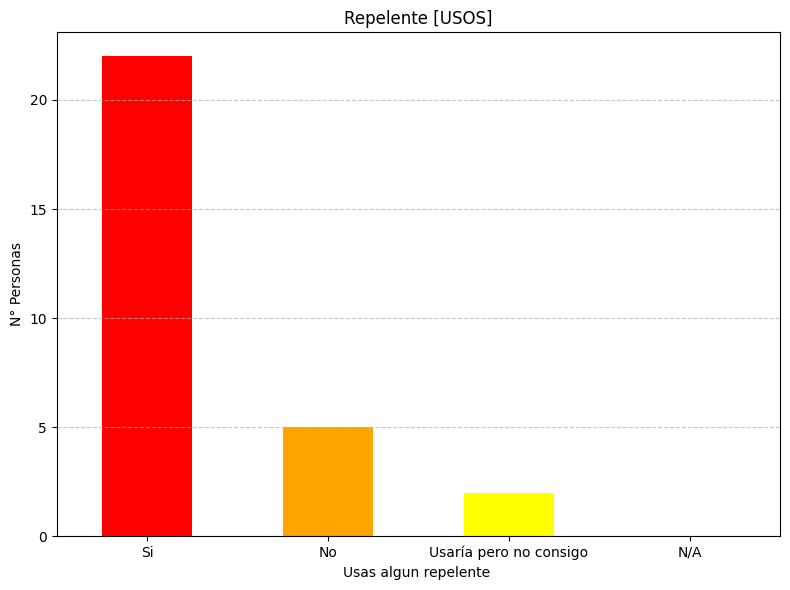

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def grafico(csv):
    repelente_counts = csv['Usas algun repelente '].value_counts()

    if 'No especificado' in repelente_counts:
        repelente_counts = repelente_counts.drop('N/A')
    else:
        repelente_counts['N/A'] = 0

    plt.figure(figsize=(8, 6))
    repelente_counts.plot(kind='bar', color=['red', 'orange', 'yellow'])
    plt.title('Repelente [USOS]')
    plt.ylabel('N° Personas')
    plt.xticks(range(len(repelente_counts)), repelente_counts.index, rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()

    plt.show()

csv = pd.read_csv("/content/Mosquitos_en_2024.csv")
csv.dropna(inplace=True)

grafico(csv)


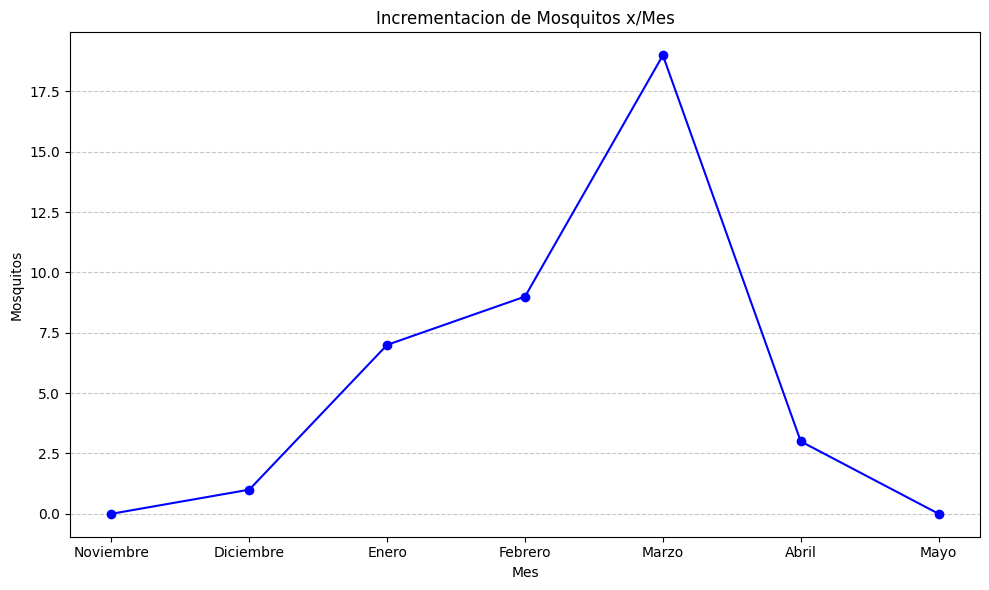

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


def lineal(csv):
    meses_counts = csv['Para vos cual fue el mes con mas mosquitos?'].str.split(';', expand=True).stack().value_counts()

    meses_ordenados = ['Noviembre', 'Diciembre', 'Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo']

    meses_counts = meses_counts.reindex(meses_ordenados, fill_value=0)

    cantidad_personas = [len(csv[csv['Para vos cual fue el mes con mas mosquitos?'].str.contains(mes)]) for mes in meses_ordenados]

    plt.figure(figsize=(10, 6))
    plt.plot(meses_ordenados, cantidad_personas, marker='o', color='blue', linestyle='-')

    plt.title('Incrementacion de Mosquitos x/Mes')
    plt.xlabel('Mes')
    plt.ylabel('Mosquitos')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()

    plt.show()


csv = pd.read_csv("/content/Mosquitos_en_2024.csv")
csv.dropna(inplace=True)

lineal(csv)



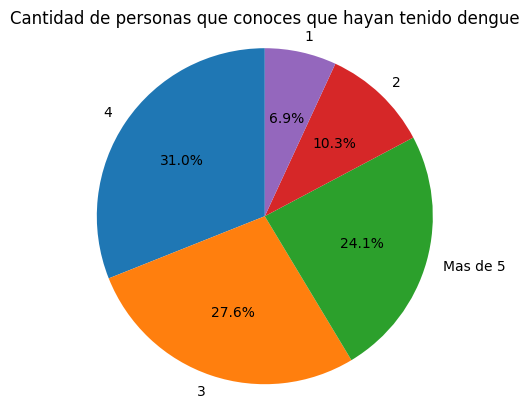

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def circular(counts):
    tipos = counts.index
    tamanio = counts.values

    fig, ax = plt.subplots()
    ax.pie(tamanio, labels=tipos, autopct='%1.1f%%', startangle=90)
    ax.axis('equal')
    plt.title('Cantidad de personas que conoces que hayan tenido dengue')
    plt.show()


csv = pd.read_csv('/content/Mosquitos_en_2024.csv')

columna = 'Cuantos personas conoces que hayan tenido dengue en 2024?'
counts = csv[columna].value_counts()

circular(counts)

